<a href="https://colab.research.google.com/github/ToddWi/Python/blob/main/py17_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 패키지 임포트

In [2]:
import numpy as np # ndarray
import pandas as pd # Series, DataFrame
import matplotlib.pyplot as plt # 시각화(그래프)
import seaborn as sns # 시각화, 예제 데이터

In [4]:
tips = sns.load_dataset('tips')

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Box plot

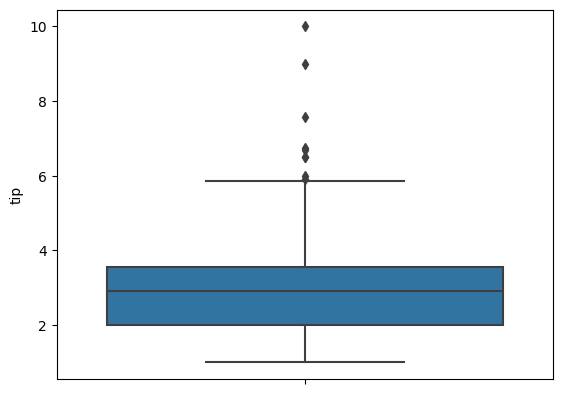

In [8]:
# tip 컬럼의 box plot
sns.boxplot(data=tips, y='tip')
plt.show()

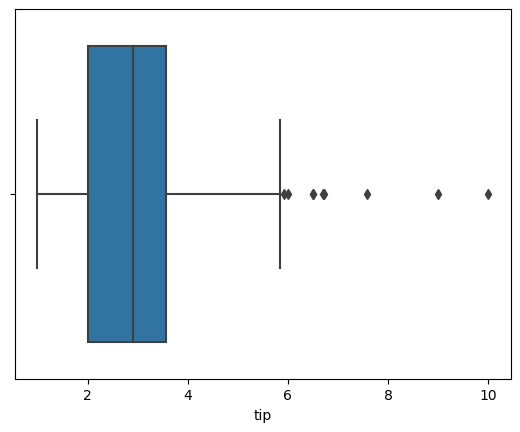

In [10]:
sns.boxplot(data=tips, x='tip')
plt.show()

## 그룹(카테고리)별 box plot

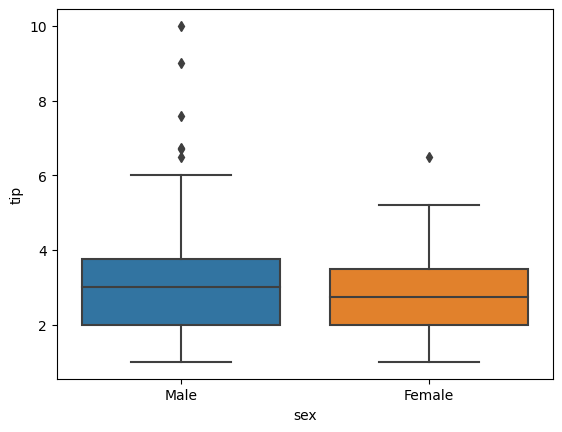

In [13]:
# 성별 tip의 box plot
sns.boxplot(data=tips, x='sex', y='tip')
plt.show()

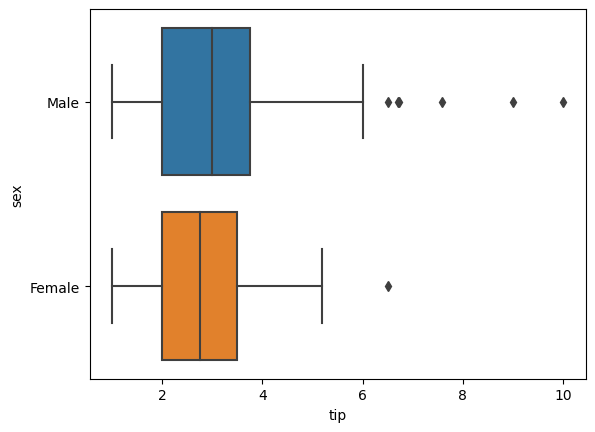

In [14]:
sns.boxplot(data=tips, x='tip', y='sex')
plt.show()

요일별 tip의 boxplot

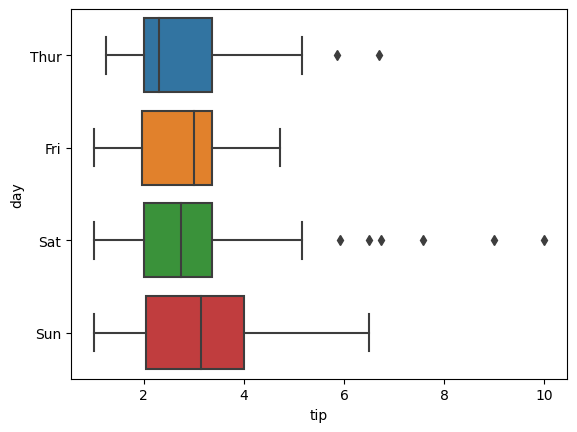

In [17]:
sns.boxplot(data=tips, x='tip', y='day')
plt.show()

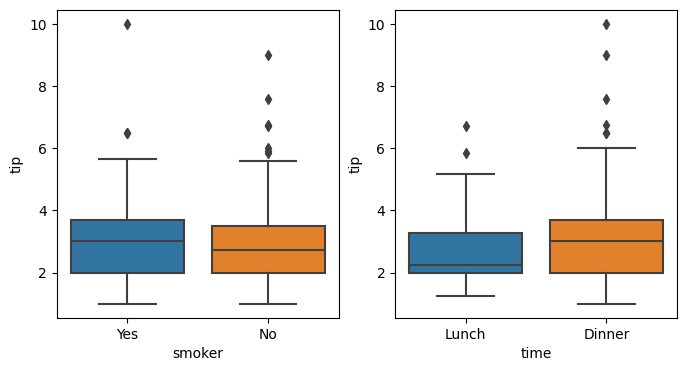

In [19]:
# 각각의 subplot에 흡연여부별 tips의 box plot, 시간별 box plot을 그리세요
fig, ax = plt.subplots(ncols=2, figsize=(8, 4))

sns.boxplot(data=tips, x='smoker', y='tip', ax=ax[0])
sns.boxplot(data=tips, x='time', y='tip', ax=ax[1])

plt.show()

# 막대 그래프

## `countplot()` 함수

카테고리 타입 변수의 빈도수를 막대로 표현한 그래프.

<Axes: xlabel='sex', ylabel='count'>

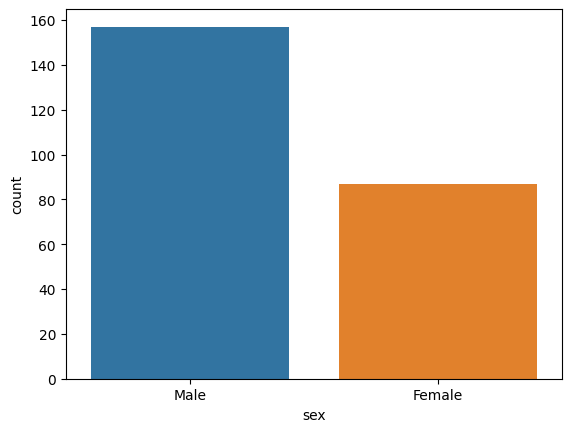

In [20]:
# 성별 빈도수 세로 막대 그래프

sns.countplot(data=tips, x='sex')

<Axes: xlabel='count', ylabel='sex'>

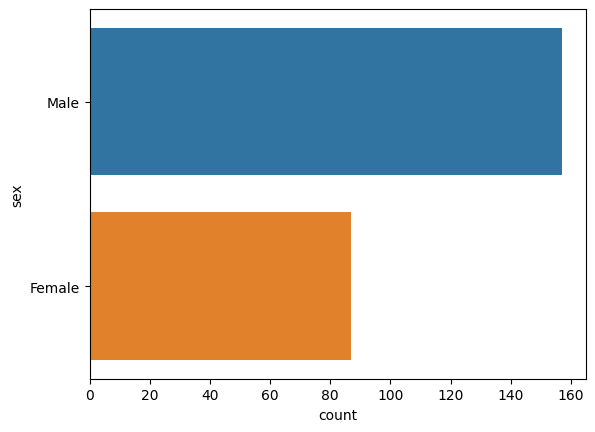

In [22]:
# 성별 빈도수 가로 막대 그래프
sns.countplot(data=tips, y='sex')

In [24]:
# 요일별 성별 빈도수
tips.groupby(['day','sex']).tip.count()

day   sex   
Thur  Male      30
      Female    32
Fri   Male      10
      Female     9
Sat   Male      59
      Female    28
Sun   Male      58
      Female    18
Name: tip, dtype: int64

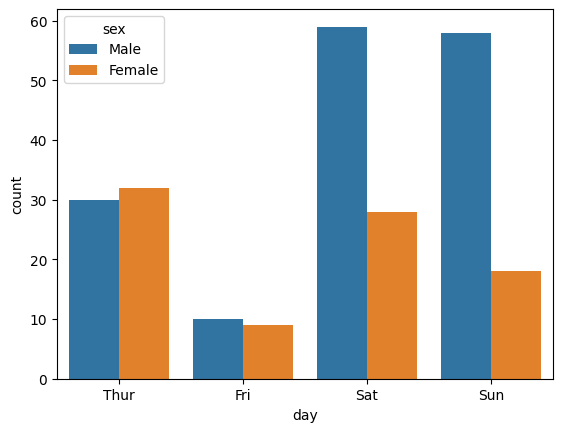

In [29]:
sns.countplot(data=tips, x='day', hue='sex') # 그룹카테고리별로 다른 색깔로 표기하기 위해서 hue파라미터를 사용한다.
plt.show()

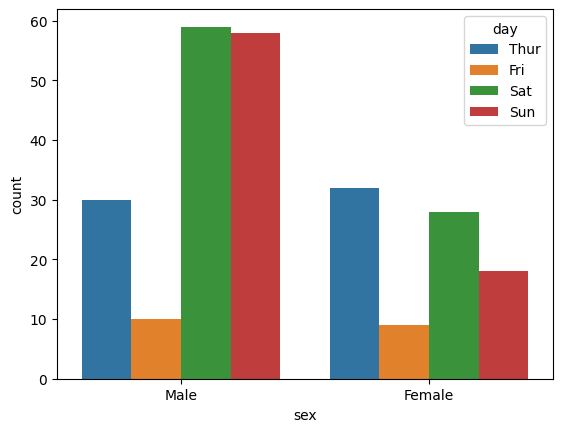

In [30]:
sns.countplot(data=tips, x='sex', hue='day')
plt.show()

In [33]:
tips.groupby(['sex', 'smoker']).tip.count()

sex     smoker
Male    Yes       60
        No        97
Female  Yes       33
        No        54
Name: tip, dtype: int64

<Axes: xlabel='smoker', ylabel='count'>

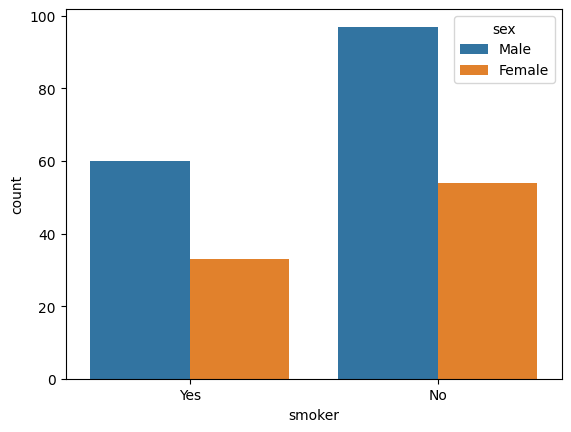

In [34]:
# 성별 흡연 여부별 빈도수
sns.countplot(data=tips, x='smoker', hue='sex')

## `barplot()` 함수

* 그룹(카테고리) 별로 변수의 통계량(평균, 표준편차, 중앙값, ...)을 막대
그래프로 표현.
* 통계량 계산 함수의 기본값은 평균(mean)
* 카테고리 타입 변수와 숫자 타입 변수를 함께 시각화.

In [36]:
# 성별 tip의 평균
tips.groupby('sex').tip.mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

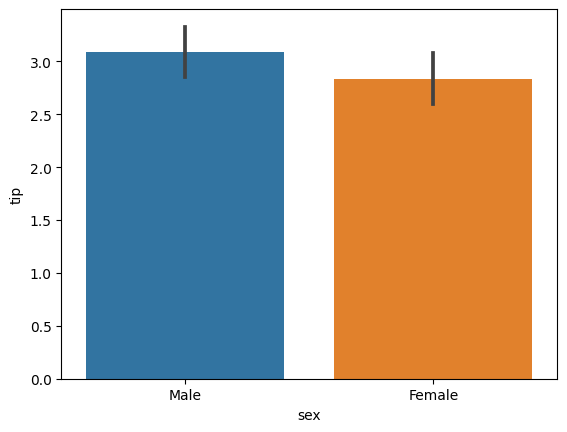

In [38]:
sns.barplot(data=tips, x='sex', y='tip') # estimator='mean: 기본값, 평균 계산
plt.show()

In [40]:
tips.groupby('sex').tip.median() # 중위값, 중앙값, 50%

sex
Male      3.00
Female    2.75
Name: tip, dtype: float64

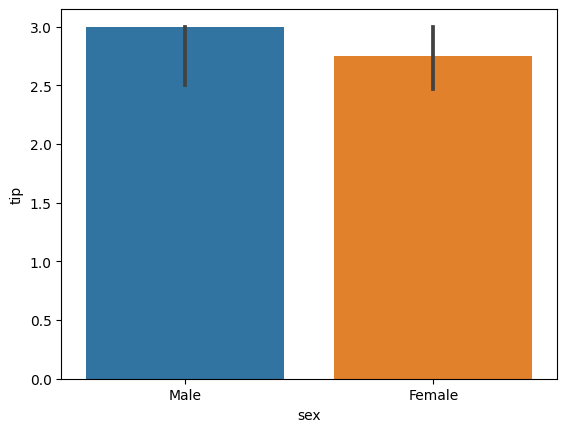

In [43]:
sns.barplot(data=tips, x='sex', y='tip', estimator='median')
plt.show()

In [46]:
tips.groupby('smoker').tip.mean()

smoker
Yes    3.008710
No     2.991854
Name: tip, dtype: float64

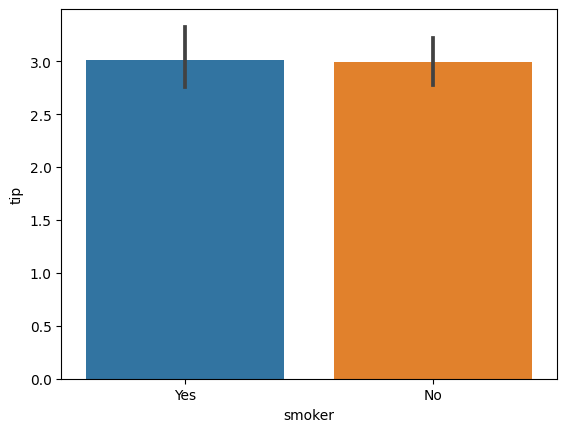

In [47]:
# 흡연여부별 tip의 평균을 시각화
sns.barplot(data=tips, x='smoker', y='tip')
plt.show()

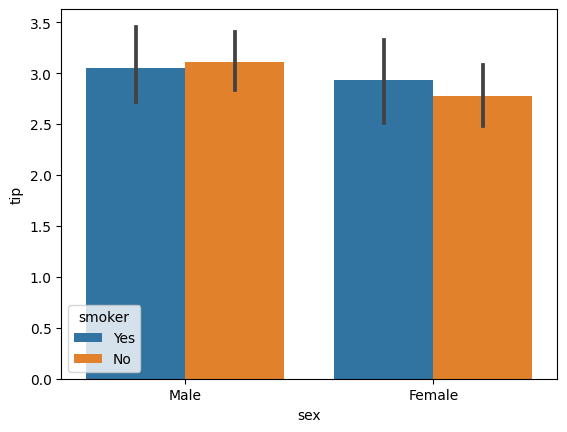

In [54]:
sns.barplot(data=tips, x='sex', y='tip', hue='smoker')
plt.show()

# 산점도: scatter-plot

  * tip ~ total_bil 산점도

<Axes: xlabel='total_bill', ylabel='tip'>

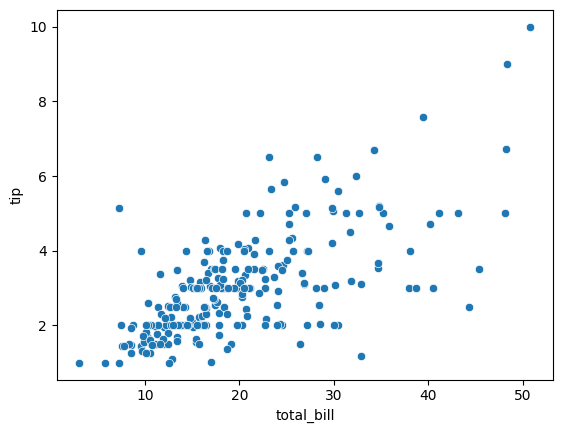

In [55]:
sns.scatterplot(data=tips, x='total_bill', y='tip')

* tip_totla_bill
* 성별에 따라서 점의 색깔이 다르게 표현

<Axes: xlabel='total_bill', ylabel='tip'>

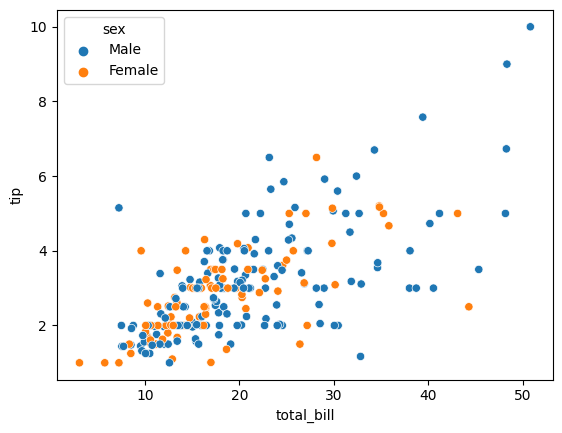

In [58]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex')

* tip ~ total_bill
* 성별에 따라서 점의 색깔을 다르게.
* 흡연여부에 따라서 점의 모양을 다르게.

<Axes: xlabel='total_bill', ylabel='tip'>

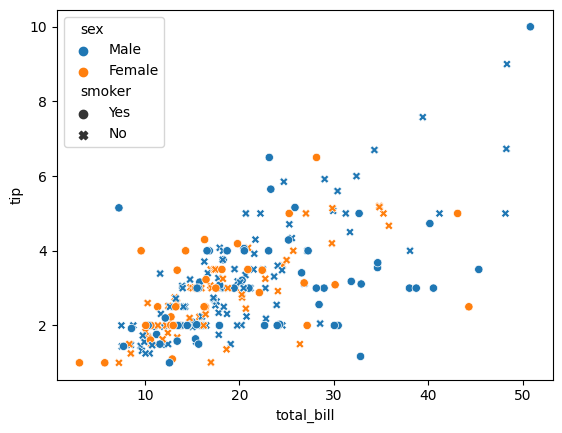

In [60]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex', style='smoker')

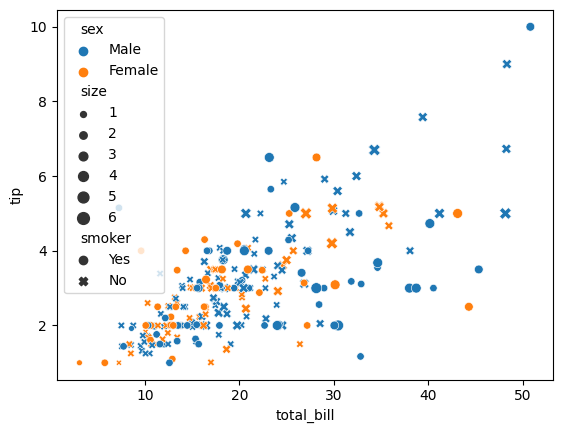

In [62]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex', style='smoker', size='size')
plt.show()

# 카테고리 그래프: `catplot()`

카테고리 별로 subplot들을 생성하고 통계값(평균, 중앙값, ...) 계산해서, 각각의 subplot에 같은 종류의 그래프들을 시각화.

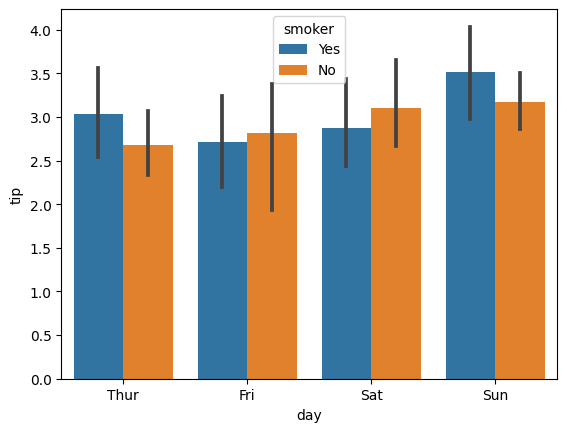

In [64]:
# 요일별 팁의 평균을 막대 그래프로 표현
sns.barplot(data=tips, x='day', y='tip', hue='smoker')
plt.show()

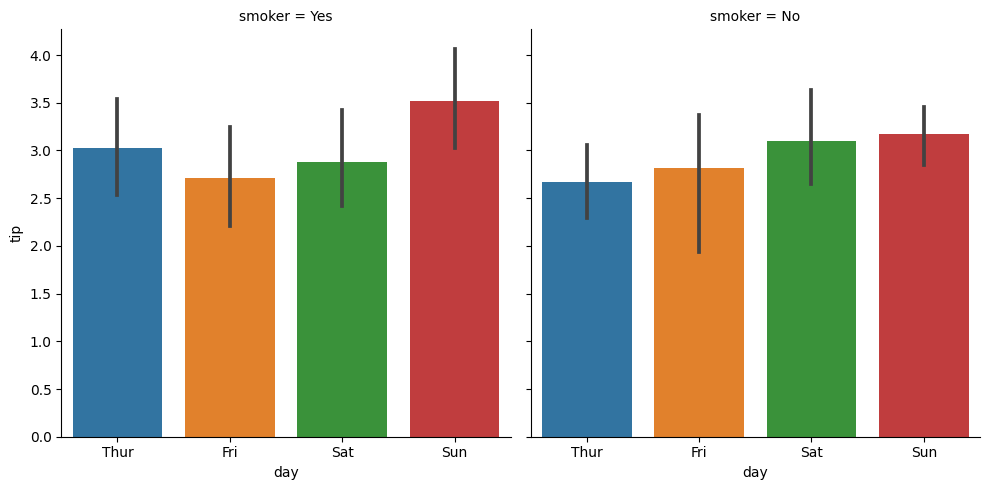

In [70]:
sns.catplot(data=tips, x='day', y='tip', col='smoker', kind='bar')
plt.show()

* 요일별 팁의 평균 막대 그래프
* 시간(Lunch, Dinner)별로 subplot을 생성.

In [76]:
tips.groupby(['day','time']).tip.mean()

day   time  
Thur  Lunch     2.767705
      Dinner    3.000000
Fri   Lunch     2.382857
      Dinner    2.940000
Sat   Lunch          NaN
      Dinner    2.993103
Sun   Lunch          NaN
      Dinner    3.255132
Name: tip, dtype: float64

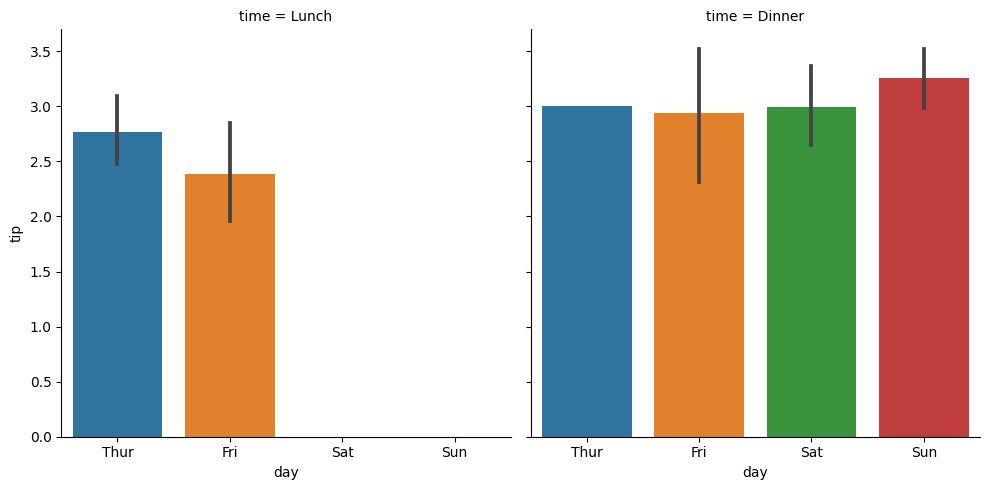

In [77]:
sns.catplot(data=tips, x= 'day', y='tip', col='time', kind='bar')

* 요일별 팁의 평균 막대 그래프
* 흡연여부 별로 subplot
* 시간별 subplot

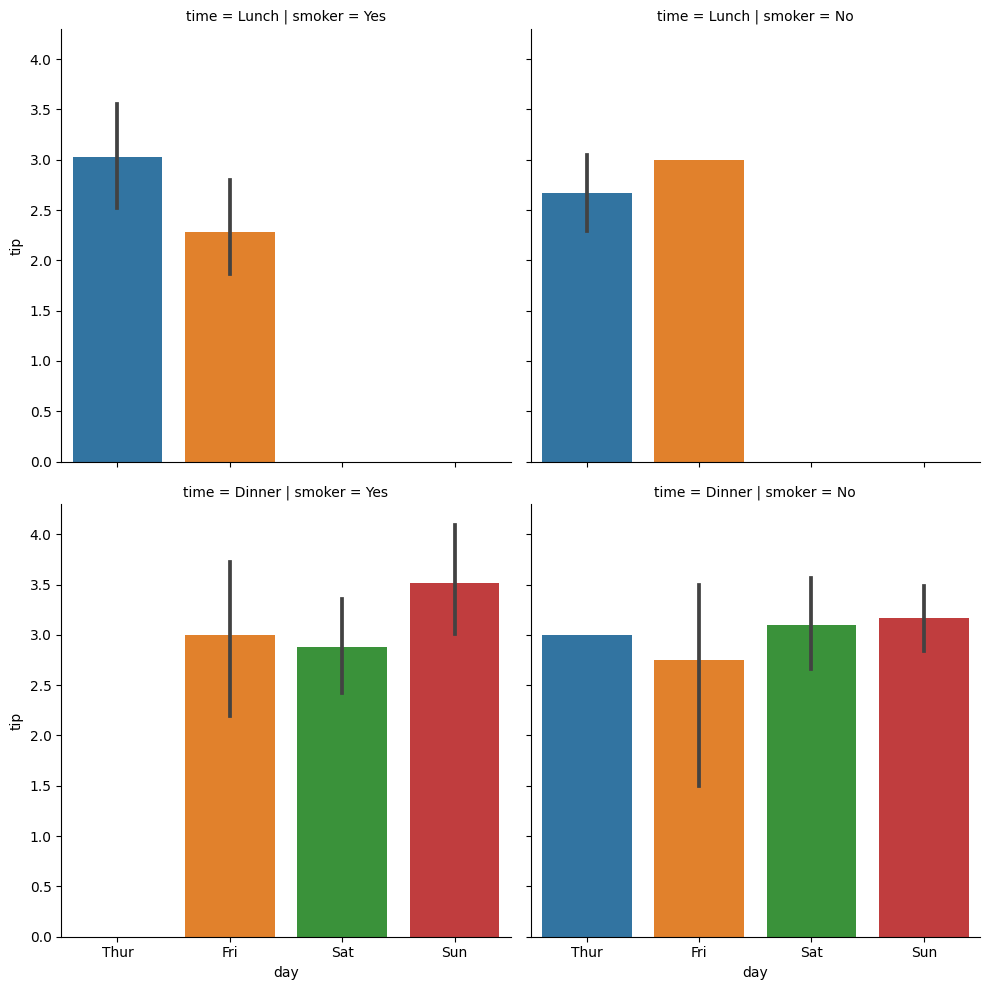

In [82]:
sns.catplot(data=tips, x='day', y='tip', col='smoker', row='time', kind='bar')

* 요일별 성별 팁의 막대 그래프
* 시간별 subplot

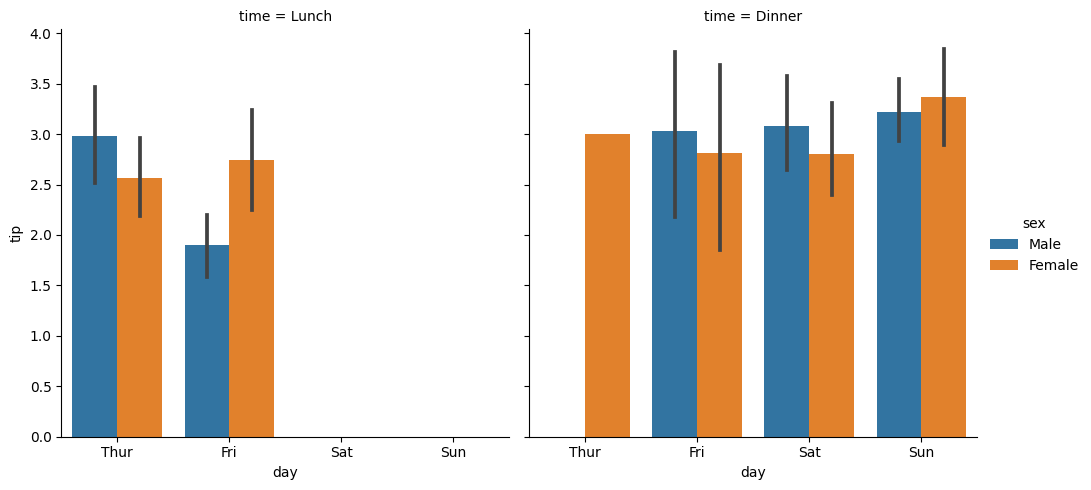

In [90]:
sns.catplot(data=tips, x='day', y='tip', hue='sex', col='time', kind='bar')

* 성별 팁의 box plot
* 요일별로 subplot

<Axes: xlabel='day', ylabel='tip'>

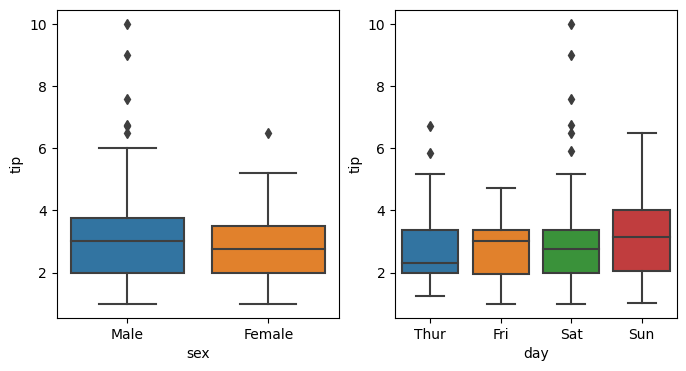

In [92]:
fig, ax = plt.subplots(ncols=2, figsize=(8, 4))
sns.boxplot(data=tips, x='sex', y='tip', ax=ax[0])
sns.boxplot(data=tips, x='day', y='tip', ax=ax[1])